<a href="https://colab.research.google.com/github/USE-Computer-Science/lectures/blob/main/trials/%D0%90%D0%BF%D1%80%D0%BE%D0%B1%D0%B0%D1%86%D0%B8%D1%8F%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1.**

На рисунке справа схема дорог N-ского района изображена в виде графа, в таблице содержатся сведения о длинах этих дорог (в километрах).

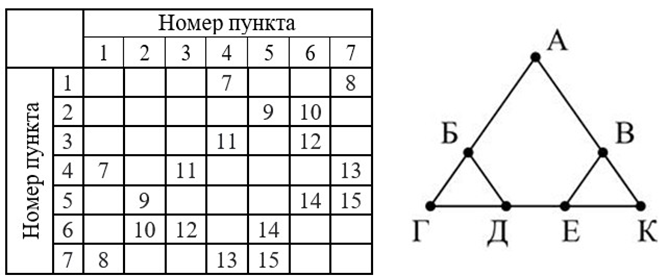

Так как таблицу и схему рисовали независимо друг от друга, нумерация населённых пунктов в таблице никак не связана с буквенными обозначениями на графе. Определите, какова длина дороги из пункта Д в пункт Е. В ответе запишите целое число – так, как оно указано в таблице.


**Ответ:** 15

In [ ]:
from itertools import permutations

table =  [[0] * 8 for _ in range(8)]
table_inc =  [[0] * 8 for _ in range(8)]

table[1][4] = table[4][1] = 7
table[1][7] = table[7][1] = 8

table[2][5] = table[5][2] = 9
table[2][6] = table[6][2] = 10

table[3][4] = table[4][3] = 11
table[3][6] = table[6][3] = 12

table[4][7] = table[7][4] = 13

table[5][6] = table[6][5] = 14
table[5][7] = table[7][5] = 15

for i in range(8):
  for j in range(8):
    if table[i][j] > 0:
      table_inc[i][j] = 1

for p in permutations([1,2,3,4,5,6,7]):
  А,Б,В,Г,Д,Е,К = p

  scheme = [[0] * 8 for _ in range(8)]
  scheme[А][Б] = scheme[А][В] = 1
  scheme[Б][А] = scheme[Б][Г] = scheme[Б][Д] = 1
  scheme[В][А] = scheme[В][Е] = scheme[В][К] = 1
  scheme[Г][Б] = scheme[Г][Д] = 1
  scheme[Д][Б] = scheme[Д][Г] = scheme[Д][Е] = 1
  scheme[Е][В] = scheme[Е][Д] = scheme[Е][К] = 1
  scheme[К][В] = scheme[К][Е] = 1

  if scheme == table_inc:
      print(f'Д - К = {Д} - {Е}')
      print(f'answer = {table[Д][Е]}')
      break

Д - К = 7 - 5
answer = 15


**Задание 2.**

Миша заполнял таблицу истинности логической функции $F$

$F = (y ∧ ¬x) ∨ (x ≡ z) ∨ ¬w$

но успел заполнить лишь фрагмент из трёх различных её строк, даже не указав, какому столбцу таблицы соответствует каждая из переменных w, x, y, z.

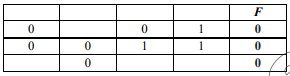
 
Определите, какому столбцу таблицы соответствует каждая из переменных w, x, y, z. В ответе напишите буквы w, x, y, z в том порядке, в котором идут соответствующие им столбцы (сначала буква, соответствующая первому столбцу; затем буква, соответствующая второму столбцу, и т.д.). Буквы в ответе пишите подряд, никаких разделителей между буквами ставить не нужно.


**Ответ:** yzxw

In [ ]:
from itertools import *

def f(x,y,z,w):
  return (y and (not x)) or (x == z) or (not w)

for a1,a2,a3,a4 in product([0,1], repeat = 4):
  table = [(0,a1,0,1),(0,0,1,1),(a2,0,a3,a4)]
  if len(table) == len(set(table)):
    for p in permutations('xyzw'):
      if [f(**dict(zip(p,t))) for t in table] == [0,0,0]:
        print(''.join(p))

yzxw


**Задание 4.**

По каналу связи передаются сообщения, содержащие только четыре буквы: А,
Б, В, Г. Для передачи используется двоичный код, удовлетворяющий условию
Фано. Для букв А, Б, В используются такие кодовые слова: А – 0; Б – 1110;
В – 1010.

Укажите кратчайшее кодовое слово для буквы Г, при котором код будет
допускать однозначное декодирование. Если таких кодов несколько, укажите
код с наименьшим числовым значением.

**Ответ:** 100

In [ ]:
А = 0
Г = 100
В = 1010
Б = 1110

**Задание 5.**

На вход алгоритма подаётся натуральное число N. Алгоритм строит по нему
новое число R следующим образом.
1. Строится двоичная запись числа N.

2. Далее эта запись обрабатывается по следующему правилу:

  а) если число N делится на 3, то к этой записи дописываются три последние
двоичные цифры;

  б) если число N на 3 не делится, то остаток от деления умножается на 3,
переводится в двоичную запись и дописывается в конец числа.

 Полученная таким образом запись является двоичной записью искомого
числа R.

3. Результат переводится в десятичную систему и выводится на экран.

Например, для исходного числа $12 = 1100_2$ результатом является число
$1100100_2 = 100$, а для исходного числа $4 = 100_2$ результатом является число
$10011_2 = 19$.

Укажите максимальное число N, после обработки которого с помощью этого
алгоритма получается число R, меньшее чем 100.

**Ответ:** 22

In [ ]:
for n in range(1000, 0, -1):
  b = bin(n)[2:]
  if n % 3 == 0:
    b += b[-3:]
  else:
    b += bin((n%3)*3)[2:]
  r = int(b,2)
  if r < 100:
    print(n)
    break

22


**Задание 6.**

Черепахе был дан для исполнения следующий алгоритм:

<pre>
Направо 315 Повтори 7 [Вперёд 16 Направо 45 Вперёд 8 Направо 135].
</pre>

Определите, сколько точек с целочисленными координатами будут находиться
внутри области, ограниченной линией, заданной данным алгоритмом. Точки на
линии учитывать не следует.

**Ответ:** 77

In [ ]:
from turtle import *

# функция проверки принадлежности точки к области соответствующего цвета
def belong(item, color):
    return any(i > 3 and canvas.itemcget(i, 'fill') == color for i in item)

tracer(0)
hideturtle()
r = 50
e = 0.1
screensize(50 * r, 50 * r)

left(90)
color('black', 'red')
right(315)
begin_fill()
for i in range(2):
    forward(16*r)
    right(45)
    forward(8*r)
    right(135)
end_fill()


up()
cnt = 0
canvas = getcanvas()
for x in range(-50*r, 50*r, r):
    for y in range(-50*r, 50*r, r):
        item = canvas.find_overlapping(x-e, y-e, x+e, y+e)
        if belong(item, 'red') and not belong(item, 'black'):
            cnt += 1
            goto(x,-y)
            dot(5, 'blue')
print(cnt)

done()

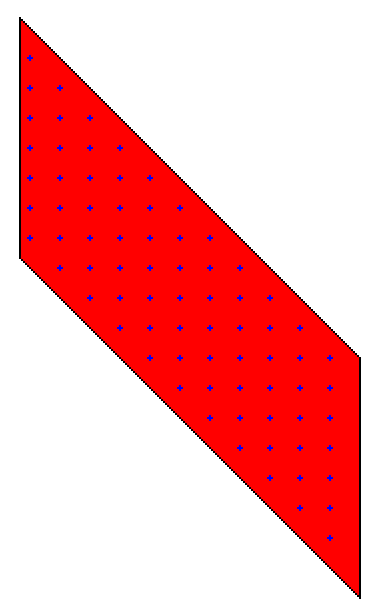

**Задание 7.**

Голосовое сообщение продолжительностью 90 секунд было записано в формате
стерео и оцифровано с глубиной кодирования 24 бита и частотой дискретизации
16 000 измерений в секунду. Сжатие данных не использовалось. Файл с
оцифрованным голосовым сообщением был передан по каналу связи,
пропускная способность которого 64 000 бит/с. Сколько секунд длилась
передача файла? В ответе запишите целое число, единицу измерения указывать
не нужно.


**Ответ:** 1080

In [ ]:
t = 90
k = 2
i = 24
f = 16_000
v = k*f*i*t

speed = 64_000
print(v / speed)

1080.0


**Задание 8.**

Все четырёхбуквенные слова, в составе которых могут быть буквы А, В, Л, О, С,
записаны в алфавитном порядке и пронумерованы начиная с 1.
Ниже приведено начало списка.

1. АААА
2. АААВ
3. АААЛ
4. АААО
5. АААС
6. ААВА

Под каким номером в списке идёт первое слово, которое начинается с буквы Л?


**Ответ:** 251

In [ ]:
index = 1
for p in product('АВЛОС', repeat = 4):
  if p[0] == 'Л':
    print(index)
    break
  index += 1


251


In [ ]:
# А - 0
# В - 1
# Л - 2
# О - 3
# С - 4
# ЛААА = 2000
int('2000',5) + 1

251

**Задание 9.**

Откройте файл электронной таблицы, содержащей в каждой строке пять
натуральных чисел. Определите количество строк таблицы, содержащих числа,
для которых выполнены оба условия:

– все числа различны;

– утроенное произведение минимального и максимального чисел строки не
больше, чем удвоенное произведение трёх её оставшихся чисел.

В ответе запишите только число.


**Ответ:** 2858

In [ ]:
f = open('9.txt')

cnt = 0

for s in f.readlines():
  row = [int(x) for x in s.split()]
  if len(row) == len(set(row)):
    row = sorted(row)
    n1 = 3 * max(row) * min(row)
    n2 = 2 * row[1] * row[2] * row[3]
    if n1 <= n2:
      cnt += 1

print(cnt)

2858


**Задание 11.**

При регистрации в компьютерной системе каждому объекту присваивается
идентификатор, состоящий из 113 символов и содержащий только десятичные
цифры и символы из 2021-символьного специального алфавита. В базе данных
для хранения каждого идентификатора отведено одинаковое и минимально
возможное целое число байт. При этом используется посимвольное кодирование
идентификаторов, все символы кодируются одинаковым и минимально
возможным количеством бит.

Определите объём памяти (в Кбайт), необходимый для хранения 32 768
идентификаторов. В ответе запишите только целое число – количество Кбайт.

**Ответ:** 4972

In [ ]:
ln = 113
i = 11
v = ln * i

v * 32_768 / 2**13

4972.0

**Задание 12.**

<pre>
Дана программа для редактора:
НАЧАЛО
  ПОКА нашлось (25) ИЛИ нашлось (355) ИЛИ нашлось (555)
    ЕСЛИ нашлось (25)
      ТО заменить (25, 5)
    КОНЕЦ ЕСЛИ
    ЕСЛИ нашлось (355)
      ТО заменить (355, 52)
    КОНЕЦ ЕСЛИ
    ЕСЛИ нашлось (555)
      ТО заменить (555, 3)
    КОНЕЦ ЕСЛИ
  КОНЕЦ ПОКА
КОНЕЦ
</pre>

На вход приведённой выше программе поступает строка, начинающаяся с цифры
«3», а затем содержащая n цифр «5» (n > 3).
Определите наименьшее значение n, при котором в строке, получившейся в
результате выполнения программы, останутся только цифры «5».

**Ответ:** 19

In [ ]:
def f(n):
  s = '3' + '5'*n
  while '25' in s or '355' in s or '555' in s:
    if '25' in s:
      s = s.replace('25','5', 1)
    if '355' in s:
      s = s.replace('355','52', 1)
    if '555' in s:
      s = s.replace('555','3', 1)
  return len(s) == s.count('5')

for n in range(4, 1000):
  if f(n):
    print(n)
    break

19


**Задание 13.**

На рисунке представлена схема дорог, связывающих города А, Б, В, Г, Д, Е,
Ж, З, И, К, Л, М. По каждой дороге можно двигаться только в одном
направлении, указанном стрелкой.

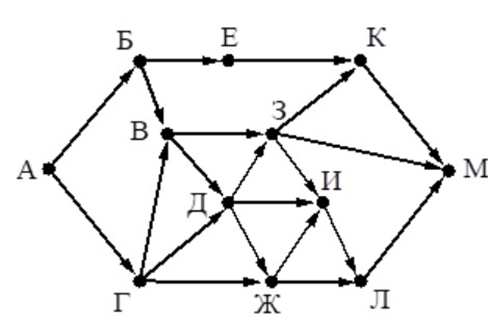

Сколько существует различных путей из города А в город М?

**Ответ:** 27

In [ ]:
А = 1
Б = А
Е = Б
Г = А
В = Г + Б
Д = В + Г
Ж = Г + Д
З = В + Д
К = Е + З
И = З + Д + Ж
Л = Ж + И
М = К + З + Л
М

27

**Задание 14.**

Операнды арифметического выражения записаны в системе счисления с
основанием 15.

$$9897x21_{15} + 12x023_{15}$$

В записи чисел переменной $х$ обозначена неизвестная цифра из алфавита 15-ричной системы счисления. Определите наименьшее значение х, при котором
значение данного арифметического выражения кратно 14. Для найденного
значения х вычислите частное от деления значения арифметического выражения
на 14 и укажите его в ответе в десятичной системе счисления. Основание
системы счисления в ответе указывать не нужно.

**Ответ:** 7853726

In [ ]:
for x in '0123456789abcde':
  t = int('9897' + x + '21', 15) + int('12' + x + '023', 15)
  if t % 14 == 0:
    print(t // 14)
    break

7853726


In [ ]:
for x in range(15):
  t = 1 + 2*15 + x*15**2 + 7*15**3 + 9*15**4 + 8*15**5 + 9*15**6
  t += 3 + 2*15 + x*15**3 + 2*15**4 + 15**5
  if t % 14 == 0:
    print(t // 14)
    break

7853726


**Задание 15.**

Обозначим через $m$ & $n$ поразрядную конъюнкцию неотрицательных целых
чисел $m$ и $n$. Так, например: 

$14$ & $5 = 1110_2$ & $0101_2 = 0100_2 = 4$.

Для какого наименьшего неотрицательного целого числа А формула

$((x$ & $42 ≠ 0) ∧ (x$ & $34 = 0)) → ¬ (x$ & $А = 0)$

тождественно истинна (т.е. принимает значение $1$) при любом неотрицательном
целом значении переменной $x$?


**Ответ:** 8

In [ ]:
def f(x, a):
  return (((x & 42) != 0) and ((x & 34) == 0)) <= (not ((x & a) == 0))

for a in range(100):
  if all(f(x, a) for x in range(1000)):
    print(a)
    break

8


**Задание 16.**

Алгоритм вычисления значения функции F(n), где n – натуральное число, задан
следующими соотношениями:

$F(n) = n,$ при $n ≥ 2025;$

$F(n) = n +3 + F(n + 3),$ если $n < 2025.$

Чему равно значение выражения $F(23)$ – $F(21)$?

**Ответ:** 1338

In [ ]:
def f(n):
  if n >= 2025:
    return n
  return n + 3 + f(n+3)

f(23) - f(21)

1338

**Задание 17.**

В файле содержится последовательность натуральных чисел. Элементы
последовательности могут принимать целые значения
от 1 до 100 000 включительно. Определите количество пар последовательности,
в которых только один из элементов является трёхзначным числом, а сумма
элементов пары кратна минимальному трёхзначному элементу
последовательности, оканчивающемуся на 5. В ответе запишите количество
найденных пар, затем минимальную из сумм элементов таких пар. В данной
задаче под парой подразумевается два идущих подряд элемента
последовательности.


**Ответ:** 2 33120

In [ ]:
def t(n):
  return 99 < n < 1000

f = open('17.txt')

nums = [int(x) for x in f]

mn = min([x for x in nums if t(x) and (abs(x) % 10 == 5)])

sums = [a+b for a,b in zip(nums, nums[1:]) if t(a) + t(b) == 1 and ((a+b) % mn == 0)]

print(len(sums), min(sums))

2 33120


**Задание 19.**

Два игрока, Петя и Ваня, играют в следующую игру. Перед игроками лежит куча
камней. Игроки ходят по очереди, первый ход делает Петя. За один ход игрок
может добавить в кучу один или четыре камня либо увеличить количество
камней в куче в три раза. У каждого игрока есть неограниченное количество
камней, чтобы делать ходы.

Игра завершается в тот момент, когда количество камней в куче становится не
менее 58.

Победителем считается игрок, сделавший последний ход, т.е. первым
получивший кучу из 58 камней или больше.

В начальный момент в куче было S камней; 1 ≤ S ≤ 57. Будем говорить, что игрок имеет выигрышную стратегию, если он может
выиграть при любых ходах противника.

Укажите такое значение S, при котором Петя не может выиграть за один ход, но
при любом ходе Пети Ваня может выиграть своим первым ходом.

**Ответ:** 19

In [ ]:
from functools import lru_cache
@lru_cache
def f(s):
  if s >= 58:
    return 0
  moves = [f(s+1), f(s+4), f(s*3)]
  loses = [x for x in moves if x <= 0]
  if loses:
    return -max(loses) + 1
  return -max(moves)

for s in range(1, 58):
  if f(s) == -1:
    print(s)


19


**Задание 20.**

Для игры, описанной в задании 19, найдите два таких минимальных значения
S, при которых у Пети есть выигрышная стратегия, причём одновременно
выполняются два условия:

− Петя не может выиграть за один ход;

− Петя может выиграть своим вторым ходом независимо от того, как будет
ходить Ваня.

Найденные значения запишите в ответе в порядке возрастания.

**Ответ:** 15 18

In [ ]:
for s in range(1, 58):
  if f(s) == 2:
    print(s)

15
18


**Задание 21.**

Для игры, описанной в задании 19, найдите минимальное значение S, при
котором одновременно выполняются два условия:

– у Вани есть выигрышная стратегия, позволяющая ему выиграть первым или
вторым ходом при любой игре Пети;

– у Вани нет стратегии, которая позволит ему гарантированно выиграть
первым ходом.

Если найдено несколько значений S, в ответе запишите наименьшее из них.

**Ответ:** 14

In [ ]:
for s in range(1, 58):
  if f(s) == -2:
    print(s)
    break

14


**Задание 23.**

Исполнитель преобразует число на экране. У исполнителя есть три команды,
которые обозначены латинскими буквами:

A. Прибавить 1

B. Прибавить 2

C. Умножить на 2

Программа для исполнителя – это последовательность команд.
Сколько существует программ, для которых при исходном числе 3 результатом
является число 18, при этом траектория вычислений содержит число 8 и не
содержит 13?

**Ответ:** 308

In [ ]:
def f(cur, fin):
  if cur > fin or cur == 13:
    return 0
  if cur == fin:
    return 1
  return f(cur+1, fin) + f(cur+2, fin) + f(cur*2, fin)

print(f(3,8)*f(8,18))

308


**Задание 24.**

Текстовый файл состоит из символов, обозначающих прописные буквы
латинского алфавита.
Определите максимальное количество идущих подряд символов, среди которых
никакие две буквы из набора букв Q, R и S (с учетом повторений) не записаны
подряд.
Для выполнения этого задания следует написать программу.

**Ответ:** 544

In [ ]:
s = open('24.txt').readline()

s = s.replace('R', 'Q').replace('S', 'Q')
while 'QQ' in s:
  s = s.replace('QQ', 'Q Q')

sub = max(s.split(), key = len)
print(len(sub))

544


**Задание 25.**

Назовём маской числа последовательность цифр, в которой также могут
встречаться следующие символы:

– символ «?» означает ровно одну произвольную цифру;

– символ «*» означает любую последовательность цифр произвольной длины;
в том числе «*» может задавать и пустую последовательность.
Например, маске 123*4?5 соответствуют числа 123405 и 12300405.

Среди натуральных чисел, не превышающих $10^8$, найдите все числа, соответствующие маске 12??1*56, делящиеся на 273 без остатка.

В ответе запишите в первом столбце таблицы все найденные числа в порядке
возрастания, а во втором столбце – соответствующие им результаты деления
этих чисел на 273.

**Ответ:** 

1248156 4572

12031656 44072

12331956 45172

12441156 45572

12741456 46672

In [ ]:
from fnmatch import fnmatch

for n in range(0,10**8+1,273):
  if fnmatch(str(n), '12??1*56'):
    print(n, n//273)

1248156 4572
12031656 44072
12331956 45172
12441156 45572
12741456 46672


**Задание 26.**

Входной файл содержит заявки пассажиров, желающих сдать свой багаж в
камеру хранения. В заявке указаны время сдачи багажа и время освобождения
ячейки (в минутах от начала суток). Багаж одного пассажира размещается в
одной свободной ячейке с минимальным номером. Ячейки пронумерованы
начиная с единицы. Размещение багажа в ячейке или её освобождение
происходит в течение 1 мин. Багаж можно поместить в только что
освобождённую ячейку начиная со следующей минуты. Если в момент сдачи
багажа свободных ячеек нет, то пассажир уходит. Определите, сколько
пассажиров сможет сдать свой багаж в течение 24 часов и какой номер будет иметь
ячейка, которую займут последней. Если таких ячеек несколько, укажите
минимальный номер ячейки.

**Входные данные**

В первой строке входного файла находится натуральное число K, не
превышающее 1000, – количество ячеек в камере хранения. Во второй строке –
натуральное число N (N ≤ 1000), обозначающее количество пассажиров. Каждая
из следующих N строк содержит два натуральных числа, каждое из которых не
превышает 1440: указанное в заявке время размещения багажа в ячейке и время
освобождения ячейки (в минутах от начала суток).

**Выходные данные**

Запишите в ответе два числа: количество пассажиров, которые смогут
воспользоваться камерой хранения, и номер последней занятой ячейки.


**Типовой пример организации данных во входном файле**

2

5

30 60

40 1000

59 60

61 1000

1010 1440

При таких исходных данных положить вещи в камеру хранения смогут первый,
второй, четвёртый и пятый пассажиры. Последний пассажир положит вещи
в ячейку 1, так как ячейки 1 и 2 будут свободны.

Ответ для примера: 4 1

**Ответ:** 586 3

In [ ]:
f = open('26.txt')
k = int(f.readline())
n = int(f.readline())

cells = [0]*k
bags = [list(map(int, s.split())) for s in f]
bags = sorted(bags)

def put(bag):
  for i in range(k):
    if cells[i] < bag[0]:
      cells[i] = bag[1]
      return i + 1
  return 0

last_index = 0
cnt = 0

for bag in bags:
  index = put(bag)
  if index:
    last_index = index
    cnt += 1

print(cnt, last_index)

586 3


**Задание 26*.**

Входной файл содержит заявки пассажиров, желающих сдать свой багаж в
камеру хранения. В заявке указаны время сдачи багажа и время освобождения
ячейки (в минутах от начала суток). Багаж одного пассажира размещается в
одной свободной ячейке с минимальным номером. Ячейки пронумерованы
начиная с единицы. Размещение багажа в ячейке или её освобождение
происходит в течение 1 мин. Багаж можно поместить в только что
освобождённую ячейку начиная со следующей минуты. Если в момент сдачи
багажа свободных ячеек нет, то пассажир уходит. Определите, сколько
пассажиров сможет сдать свой багаж в течение 24 часов и какой номер будет иметь
ячейка, которую займут последней. Если таких ячеек несколько, укажите
минимальный номер ячейки.

**Входные данные**

В первой строке входного файла находится натуральное число K, не
превышающее 1000, – количество ячеек в камере хранения. Во второй строке –
натуральное число N (N ≤ 1000), обозначающее количество пассажиров. Каждая
из следующих N строк содержит два натуральных числа, каждое из которых не
превышает 1440: указанное в заявке время размещения багажа в ячейке и время
освобождения ячейки (в минутах от начала суток).

**Выходные данные**

Запишите в ответе два числа: количество пассажиров, которые смогут
воспользоваться камерой хранения, и номер последней занятой ячейки.


**Типовой пример организации данных во входном файле**

2

5

30 60

40 1000

59 60

61 1000

1010 1020

1010 1440

При таких исходных данных положить вещи в камеру хранения смогут первый,
второй, четвёртый, пятый и шестой пассажиры. Минимальный индекс последней занятой ячейки - 1, т.к. два последних пассажира положат свой багаж одновременно.

Ответ для примера: 5 1

**Ответ:** 586 1

In [ ]:
f = open('26.txt')
k = int(f.readline())
n = int(f.readline())

cells = [0]*k
bags = [list(map(int, s.split())) for s in f]
bags = sorted(bags)

def put(bag):
  for i in range(k):
    if cells[i] < bag[0]:
      temp = cells[i]
      cells[i] = bag[1]
      return i + 1, temp
  return 0, 0

last_index = 0
time = -1
cnt = 0

for bag in bags:
  index, cur_time = put(bag)
  if index:
    cnt += 1
    if cur_time != time:
      last_index = index
      time = cur_time

print(cnt, last_index)

586 1
[[1, 562], [3, 580], [5, 790], [8, 1291], [10, 144], [11, 1128], [13, 955], [19, 53], [20, 946], [24, 536], [27, 552], [28, 214], [29, 387], [30, 1358], [36, 124], [37, 654], [38, 1362], [39, 861], [43, 237], [44, 1324], [46, 961], [48, 631], [51, 283], [52, 793], [54, 1393], [56, 1059], [58, 444], [59, 130], [60, 380], [61, 1184], [63, 844], [64, 1037], [68, 404], [76, 363], [81, 318], [82, 1414], [84, 627], [87, 667], [90, 226], [91, 999], [100, 537], [102, 589], [107, 1097], [111, 1233], [113, 407], [115, 375], [121, 285], [126, 856], [128, 1063], [129, 1119], [130, 658], [132, 483], [133, 895], [134, 160], [135, 553], [138, 331], [142, 1078], [143, 747], [144, 1201], [145, 1061], [147, 669], [149, 225], [153, 1426], [155, 947], [158, 843], [159, 690], [160, 741], [161, 1284], [162, 439], [163, 172], [164, 1161], [165, 407], [170, 732], [173, 274], [174, 484], [179, 420], [181, 226], [185, 320], [188, 1125], [190, 304], [191, 359], [193, 1333], [194, 747], [197, 906], [199, 42

**Задание 27.**

По каналу связи передаётся последовательность целых неотрицательных чисел
– показания прибора, полученные с интервалом в 1 мин. в течение T мин. (T –
целое число). Прибор измеряет количество атмосферных осадков, полученное
регистратором за минуту, предшествующую моменту регистрации, и передаёт
это значение в условных единицах измерения.

Определите два таких переданных числа, чтобы между моментами их передачи
прошло не менее K минут, а их сумма была максимально возможной. Укажите
найденное суммарное количество осадков.

**Входные данные**

Даны два входных файла (файл A и файл B), каждый из которых в первой строке
содержит натуральное число K – количество минут, которое должно пройти
между двумя передачами показаний, а во второй – количество переданных
показаний N (1 ≤ N ≤ 10 000 000, N > K). В каждой из следующих N строк
находится одно целое неотрицательное число, не превышающее 100 000,
обозначающее количество осадков за соответствующую минуту.

**Выходные данные**

Запишите в ответе два числа: сначала значение искомой величины для файла А,
затем – для файла B.

**Типовой пример организации данных во входном файле:**

3

5

15

10

200

0

30

При таких исходных данных максимально возможное суммарное количество
осадков равно 45 – это сумма осадков, выпавших на первой и пятой минутах.

Ответ для примера: 45


**Ответ:** 174902 3094684

In [ ]:
f = open('27A.txt')
k = int(f.readline())
n = int(f.readline())

data = [int(x) for x in f]
mx = 0

for i in range(n):
  for j in range(i+k, n):
    mx = max(mx, data[i]+data[j])

print(mx)

174902


In [ ]:
def getMaxSum(arr, k, n):  
    # Stores the prefix maximum array
    preMax = [0]*n
 
    # Base Case
    preMax[0] = arr[0]
    for i in range(1, n):
        preMax[i] = max(preMax[i - 1], arr[i])
 
    res = -float('inf')
 
    for i in range(k, n):
        res = max(res, arr[i] + preMax[i - k])
 
    return res


f = open('27B.txt')
k = int(f.readline())
n = int(f.readline())

data = [int(x) for x in f]
getMaxSum(data, k, n)


In [ ]:
from itertools import permutations, product, combinations
cnt = 0
for a in combinations('0369  ', r = 4):
  s = ''.join(a)
  if ' 0' in s or ' 3' in s or ' 6' in s or ' 9' in s:
    continue
  cnt += 1
  print(a)

cnt

('0', '3', '6', '9')
('0', '3', '6', ' ')
('0', '3', '6', ' ')
('0', '3', '9', ' ')
('0', '3', '9', ' ')
('0', '3', ' ', ' ')
('0', '6', '9', ' ')
('0', '6', '9', ' ')
('0', '6', ' ', ' ')
('0', '9', ' ', ' ')
('3', '6', '9', ' ')
('3', '6', '9', ' ')
('3', '6', ' ', ' ')
('3', '9', ' ', ' ')
('6', '9', ' ', ' ')


15